# Ensembles

Alípio Jorge, December 2020

## Overview

- What is an ensemble?
- Bagging
- Random Forests
- Boosting
- Why trees?

# What is an ensemble?

- **Imagine**
    - A project evaluation committee
    - A juri in a court
    - The government of a country
    - The referees in a VAR decision
- A **Committee** of experts
    - Each model is one expert
    - Each expert has a **different view**
    - The final decision is a combination of the decisions of the experts


# What is an ensemble?

## A generic ensemble architecture
(Image from Han et al)

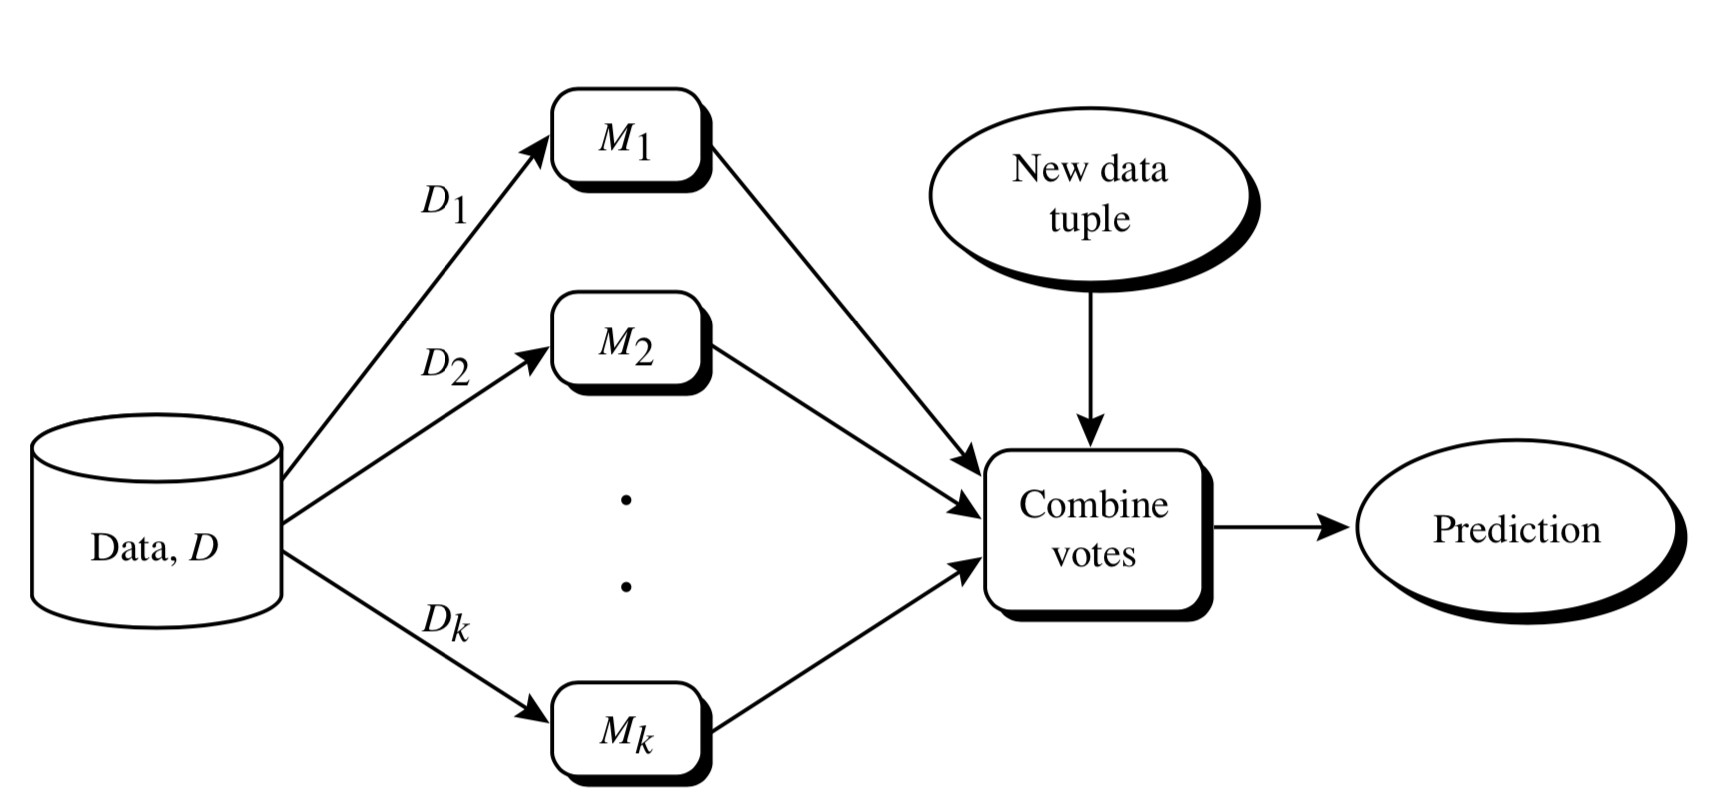

In [131]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("/Users/amjorge/Dropbox/aulas/IntroducaoCienciaDados/R-notes-IDS/imagens-IDS/ensembles-general-hanetal.png")

# Why ensembles?

- Robustness
    - individual errors are **compensated** by the other experts
        - a judge that overlooks a piece of evidence
- Consistency
    - collective decisions are more **stable**
- Power and accuracy
    - the collective may be **better** than each individual

# More formally: learning

- **Given** 
    - a dataset $D$ with labelled examples
- **Produce**
    - $k$ models $M_1, \ldots, M_k$ from $D$
- **Issues**
    - how **different** must the models be?
    - **how many** models do we need?
    - how do we **obtain** the models from data?


# More formally: classification and regression

- **Given**
    - an ensemble of $k$ models
    - an example $x$ to classify/predict
- **Do**
    - **obtain** the decision $\hat{y}_i = M_i(x)$ for each model $M_i$
        - each $M_i$ is a **base** model
    - **combine** the decisions into $\hat{y} = Aggreg_i( \hat{y}_i )$
- **Issues**
    - how to **combine** the decisions
        - voting, averaging, ...


# Famous Ensemble methods (families)

- Bagging
    - using different sub-samples of $D$ for each $M_i$
- Random Forests
    - sub-sample $D$ and use different attributes in each (step of) $M_i$
- Boosting
    - build each $M_i$ to correct the errors of other models
- **Note**
    - these methods are **mostly** for decision trees
        - we will see why
    - but **not only**

# Simple Example

- A classification problem
    - 2 inputs
    - linear diagonal boundary
- Result with a single tree (unpruned)


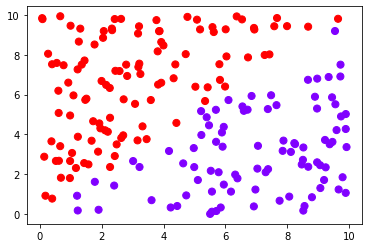

In [90]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

N = 200
X = np.random.rand(N,2)*10.0
y = np.array([0]*N)
y[(X[:,0]-X[:,1])<0]=1
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [132]:
from sklearn.tree import DecisionTreeClassifier
single_tree = DecisionTreeClassifier().fit(X, y)

In [20]:
import numpy as np 

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

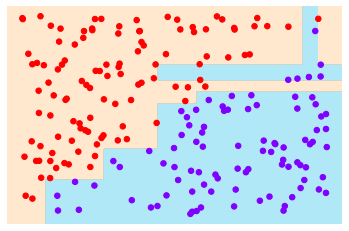

In [100]:
visualize_classifier(single_tree, X, y)

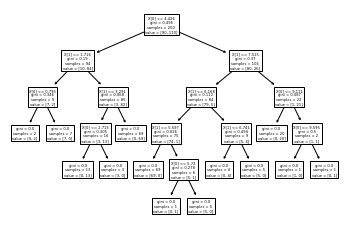

In [101]:
from sklearn import tree

dump=tree.plot_tree(single_tree)

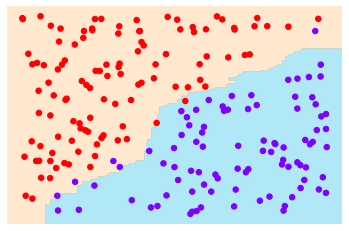

In [134]:
from sklearn.ensemble import BaggingClassifier

base_tree = DecisionTreeClassifier()
bag = BaggingClassifier(base_tree, n_estimators=100, max_samples=0.2,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

# Bagging

- **Bootstrap Aggregation**
    - aggregate models obtained from bootstrap
- **Bootstrap Sampling**
    - Sample from $D$ **with replacement**
    - Example: $D=\{1,2,3,4,5,6\}$
    - Bootstrap sample of $D$ is for example $\{1,2,2,4,6,6\}$

# Bagging

- **Given** 
    - a dataset $D$ with labelled examples
    - a number $k$ of models
    - a learning algorithm $A$
- **For each $1 \le i \le k$**
    - $S_i$ = bootstrap sample from $D$
    - $M_i$ = $A(S_i)$
- **Notes**
    - typically $A$ is a decision tree learner


# Bagging

- **Classification**
    - Majority vote
        - $\hat{y}(x)=mode\{M_1(x), \ldots, M_k(x)\}$
- **Regression**
    - Average
        - $\hat{y}(x)=mean\{M_1(x), \ldots, M_k(x)\}$

# Why Bagging?

- Models are **different** from each other
    - each model is learned from a different sample
    - an ensemble of similar models adds nothing
- **Why** are they different?
    - each sample misses less representative cases
        - noise, rare situations
    - each sample has repeated cases
        - tends to give importance to more likely cases
- Bootstrapping **simulates** having more data
    - you can obtain multiple views from one $D$ and one $A$
    - very data efficient

# Why Bagging?

- Learning agorithms have two main **error components**
    - Bias
    - Variance
- **Bias**
    - the error caused by the assumptions of the algorithm
- **Variance**
    - the error caused by important random processes
        - sample
        - random initialization


# Why Bagging?

- **Error decomposition**
- Expected prediction error
    - $Error(x) = IrreducibleError + Bias^2 + Variance$
- **Bias-Variance tradeoff**
    - variance can be reduced by increasing bias
        - e.g. linear models are stable but have strong assumptions
    - reducing bias ususally leads to increase in variance
        - e.g. decision trees are sensitive to changes in data


# Why Bagging?

- Bagging and the tradeoff 
    - **reduces** variance
    - does not affect (much) bias
- Bagging **works better** when the base models have
    - low bias (more expressive)
    - high variance (sensitive to changes)
    - low computational cost
- Bagging is popular with **Decision Trees**

# Random Forests

- In bagging models are different
    - but we can **reduce the correlation** of models in an ensemble
    - less correlated models may **improve predictive performance**
- RF: a **generalization** of Bagging
    - a bootstrap sample for each base model
    - a different set of attributes for each base model
        - or in each step of the model construction
- RF: designed for decision trees
    - but principles can be used with other models
- RF were introduced by Leo Breiman (1928-2005)

# Random Forests


- **Given** 
    - a dataset $D$ with labelled examples
    - a number $k$ of models (or tries)
    - a number $m$ of attributes to use in each split
    - a decision tree learning algorithm $DT$
- **For each $1 \le i \le k$**
    - $S_i$ = bootstrap sample from $D$
    - $M_i$ is learned with $DT$ but sampling $m$ attributes in each split
- **Notes**
    - typically $A$ is a decision tree learner


# Random Forests

- **Example:** build a RF base tree for $Iris$ with $m=2$
    - attributes are 
        - $SL$=Sepal Length, $SW$=Sepal Width, 
        - $PL$=Petal Length, $PW$=Petal Width, 
    - take a bootstrap sample $S$ from $Iris$
        - $S$ has the same size of $Iris$
        - some examples are repeated
        - some are missing
    - Randomly sample 2 attributes
        - e.g. $SL$ and $PW$
    - Make the top split using only these
    - Build the rest of the tree
        - allways sample $m=2$ attributes for each split


# Random Forests

- Reduce variance
- More accurate than Bagging (in general)
- Robust to errors and outliers
- Base models are less correlated
    - if $m$ is low
    - suggested $m=log_2(|D|)+1$
- Improves as $k$ increases
    - does not tend to overfit
- Faster than Bagging

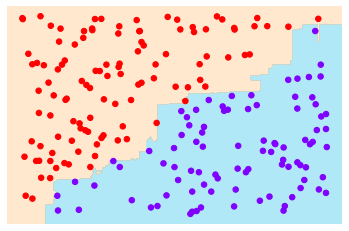

In [135]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features=1,random_state=0)
visualize_classifier(rf, X, y);

# Boosting

- Boosting is a very **powerful idea**
    - found in many different variants
- Boosting is building an ensemble by
    - minimizing the error
    - using **optimization** based search
    

# Boosting

- Questions:
    - can we build a **strong model** from weak base models?
    - can it be **iterativelly** improved?
- A weak model
    - slightly better than random guessing
        - e.g. a tree of depth 1
- Overall idea (intuitively)
    - obtain a first model
    - identify **difficult cases**
    - obtain a new model that **corrects these errors**
    - **iterate** until convergence or a maximum number of models
    - apply models with **weighted** aggregation

# AdaBoost (Yoav Freund and Robert Schapire)

- A popular boosting algorithm
    - Adaptive Boosting
- Overall idea
    - start with $D$ and give equal weights to all cases
    - in each iteration
        - get a sample $S$ from $D$ **using the weights** 
        - build a model from $S$
        - **increase the weights** of cases with wrong decisions

# AdaBoost: in detail

- **Given** 
    - a dataset $D$ with $n$ class-labelled examples
    - a number $k$ of models (or tries)
    - a learning algorithm $A$
- **Assign** equal weights $w_i=1/n$
- **For each $1 \le i \le k$**
    - $S_i$ = sample $D$ with replacement using $w_i$
    - $M_i = A(S_i)$
    - $e_i =$ error rate of $M_i$ on $S_i$
    - if $e_i < 0.5$ repeat previous steps
    - for each example $x_i$ update weights
        - $w_i = w_i . e_i/(1-e_i)$ // high $e_i$ -> low $w_i$
    - max-normalize the weigths


# AdaBoost

## Weight as a function of error

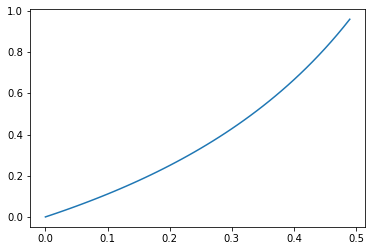

In [124]:
e = np.arange(0,0.5,0.01)
plt.plot(e,e/(1-e),);

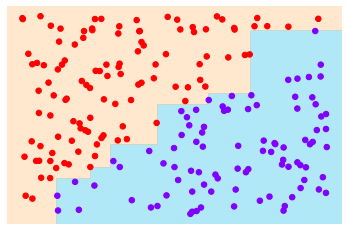

In [136]:
from sklearn.ensemble import AdaBoostClassifier
boosted_tree = AdaBoostClassifier(n_estimators=100, random_state=0)
boosted_tree.fit(X, y)
visualize_classifier(boosted_tree, X, y);

# Boosting

- Computational **efficiency**
    - base learners are very simple
- **one parameter** ($k$)
    - better "off-the-shelf" algorithm
- Can be stated as an **optimization** approach
    - very powerful paradigm
- Tends to beat Bagging and RF
- May **overfit**
    - by focusing "too much" on recovering errors
    - Bagging and RF are not prone to overfitting

# Other tasks

- Regression
    - These approaches are directly adapted
- Recommender systems
- Clustering and non-supervised learning

# Interpretability

- Decision trees are **highly interpretable**
    - transparency
    - explainability
- Ensembles complicate **interpretability**
    - e.g. aggregation of 100 models
- But we can obtain a rank of important features
    - Features that are more common in the trees
    - Features in the top split
    - Mean decrease impurity (normalised)
        - how much a feature decreases impurity in a tree
- An overview of feature importance
    - https://machinelearningmastery.com/calculate-feature-importance-with-python/

# Interpretability

## Feature importance 
- is always calculated for
    - Decision Trees
    - Random Forests
    - AdaBoost

In [138]:
single_tree.feature_importances_, rf.feature_importances_, boosted_tree.feature_importances_

(array([0.55779821, 0.44220179]),
 array([0.5193053, 0.4806947]),
 array([0.51, 0.49]))


# References

- Books
  - Han, Kamber & Pei, Data Mining Concepts and Techniques, Morgan
Kaufman.
  - Jake VanderPlas, Data Science Handbook, O'Reilly
  - Tibshirani et al., Elements of Statistical Learning
